# Hackathon-Healthcare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from scipy import stats
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
First_Health_Camp_Attended=pd.read_csv("First_Health_Camp_Attended.csv")
Health_Camp_Detail=pd.read_csv("Health_Camp_Detail.csv")
Patient_Profile=pd.read_csv('Patient_Profile.csv')
Second_Health_Camp_Attended=pd.read_csv('Second_Health_Camp_Attended.csv')
Third_Health_Camp_Attended=pd.read_csv('Third_Health_Camp_Attended.csv')
train=pd.read_csv('Train.csv')
test=pd.read_csv('test_l0Auv8Q.csv')

Merging the files into one Train file

In [3]:
#### Getting the target

for c in [First_Health_Camp_Attended,Second_Health_Camp_Attended,Third_Health_Camp_Attended, train]:
  c['id'] = c['Patient_ID'].astype('str') + c['Health_Camp_ID'].astype('str')
Third_Health_Camp_Attended = Third_Health_Camp_Attended[Third_Health_Camp_Attended['Number_of_stall_visited'] > 0]

all_patients_in_camp = pd.Series(First_Health_Camp_Attended['id'].tolist() + Second_Health_Camp_Attended['id'].tolist() + Third_Health_Camp_Attended['id'].tolist()).unique()

train['target'] = 0
train.loc[train['id'].isin(all_patients_in_camp), 'target'] = 1

Finding the target feature

In [4]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,id,target
0,489652,6578,10-Sep-05,4,0,0,0,2,4896526578,1
1,507246,6578,18-Aug-05,45,5,0,0,7,5072466578,0
2,523729,6534,29-Apr-06,0,0,0,0,0,5237296534,1
3,524931,6535,07-Feb-04,0,0,0,0,0,5249316535,0
4,521364,6529,28-Feb-06,15,1,0,0,7,5213646529,1


In [5]:
train = pd.merge(train, Patient_Profile, on = 'Patient_ID', how = 'left')
test = pd.merge(test, Patient_Profile, on = 'Patient_ID', how = 'left')

In [6]:
train = pd.merge(train, Health_Camp_Detail, on = 'Health_Camp_ID', how = 'left')
test = pd.merge(test, Health_Camp_Detail, on = 'Health_Camp_ID', how = 'left')

In [7]:
train.head(10)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,id,target,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,4896526578,1,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,5072466578,0,0,0,0,0,1,75,40,08-Sep-04,C,Others,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,5237296534,1,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,5249316535,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,5213646529,1,0,0,0,1,1,70,40,04-Jul-03,I,Technology,30-Mar-06,03-Apr-06,Second,A,2
5,494493,6570,20-May-05,0,0,0,0,0,4944936570,0,0,0,0,0,None,None,None,01-Feb-04,NaN,NaN,09-Jul-05,22-Jul-05,First,E,2
6,523001,6562,22-May-05,0,0,0,0,0,5230016562,0,0,0,0,0,None,None,None,07-Apr-05,NaN,NaN,24-Nov-04,02-Jun-05,First,F,2
7,500733,6535,31-Jan-04,0,0,0,0,0,5007336535,0,0,0,0,0,None,None,None,23-Mar-03,D,NaN,01-Feb-04,18-Feb-04,First,E,2
8,501155,6538,31-Jan-04,0,0,0,0,0,5011556538,0,0,0,0,0,None,None,None,31-Jan-04,B,NaN,09-Jan-04,04-Feb-05,First,F,2
9,501457,6538,12-Aug-04,0,0,0,0,0,5014576538,0,0,0,0,0,0,None,None,28-Jan-03,B,NaN,09-Jan-04,04-Feb-05,First,F,2


In [8]:
print('Data Length',len(train['target']))
for i in train.columns:
  print(i,train[i].isna().sum(),'\n Percentage Missing is ',(train[i].isna().sum()/len(train['target'])*100))

Data Length 75278
Patient_ID 0 
 Percentage Missing is  0.0
Health_Camp_ID 0 
 Percentage Missing is  0.0
Registration_Date 334 
 Percentage Missing is  0.4436887271181488
Var1 0 
 Percentage Missing is  0.0
Var2 0 
 Percentage Missing is  0.0
Var3 0 
 Percentage Missing is  0.0
Var4 0 
 Percentage Missing is  0.0
Var5 0 
 Percentage Missing is  0.0
id 0 
 Percentage Missing is  0.0
target 0 
 Percentage Missing is  0.0
Online_Follower 0 
 Percentage Missing is  0.0
LinkedIn_Shared 0 
 Percentage Missing is  0.0
Twitter_Shared 0 
 Percentage Missing is  0.0
Facebook_Shared 0 
 Percentage Missing is  0.0
Income 0 
 Percentage Missing is  0.0
Education_Score 0 
 Percentage Missing is  0.0
Age 0 
 Percentage Missing is  0.0
First_Interaction 0 
 Percentage Missing is  0.0
City_Type 33208 
 Percentage Missing is  44.11381811419007
Employer_Category 60075 
 Percentage Missing is  79.80419245994845
Camp_Start_Date 0 
 Percentage Missing is  0.0
Camp_End_Date 0 
 Percentage Missing is  0.0
Ca

There are 3 columns with Missing Values. However there are 2 columns City_type and Employer_Category which have a significant missing values.

In [9]:
print(train.dtypes,'\n',test.dtypes)

Patient_ID            int64
Health_Camp_ID        int64
Registration_Date    object
Var1                  int64
Var2                  int64
Var3                  int64
Var4                  int64
Var5                  int64
id                   object
target                int64
Online_Follower       int64
LinkedIn_Shared       int64
Twitter_Shared        int64
Facebook_Shared       int64
Income               object
Education_Score      object
Age                  object
First_Interaction    object
City_Type            object
Employer_Category    object
Camp_Start_Date      object
Camp_End_Date        object
Category1            object
Category2            object
Category3             int64
dtype: object 
 Patient_ID            int64
Health_Camp_ID        int64
Registration_Date    object
Var1                  int64
Var2                  int64
Var3                  int64
Var4                  int64
Var5                  int64
Online_Follower       int64
LinkedIn_Shared       int64
Twit

We can notice that Category_3 is a categorical column but is mentioned as a Numerical feature in the dataset. 

In [10]:
train['Category3'] = train['Category3'].astype(str)
test['Category3'] = test['Category3'].astype(str)

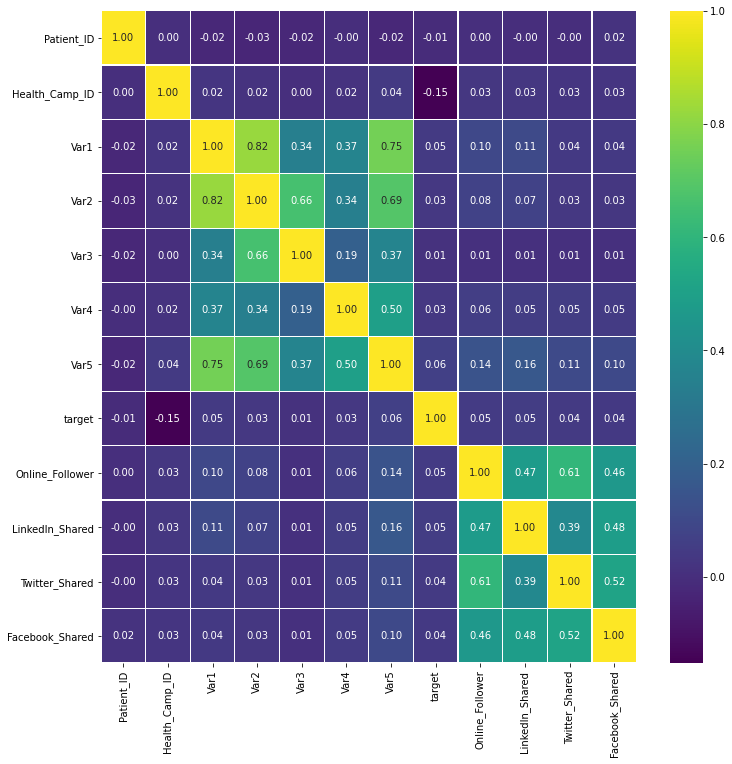

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),cmap='viridis',annot=True,linewidths=0.2,fmt='.2f')
plt.show()

Var_5, Var1 and Var2 have high correlation with each other. Thus in order to prevent Multicolinearity we can drop 2 columns

In [12]:
train.drop(['Var5','Var1'],inplace=True,axis=1)
test.drop(['Var5','Var1'],inplace=True,axis=1)

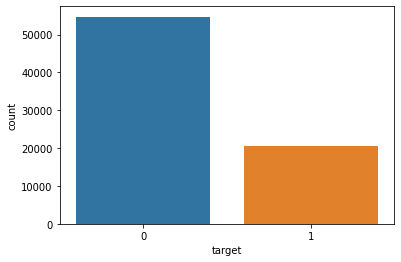

In [13]:
sns.countplot(data =train, x='target')
plt.show()

From above we can notice that the dataset is not imbalanced 

In [14]:
df_train_data_cat=train.select_dtypes(exclude=np.number)
df_train_data_con=train.select_dtypes(include=np.number)
print(df_train_data_cat.columns)
print('=============')
print(df_train_data_con.columns)

Index(['Registration_Date', 'id', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3'],
      dtype='object')
Index(['Patient_ID', 'Health_Camp_ID', 'Var2', 'Var3', 'Var4', 'target',
       'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared'],
      dtype='object')


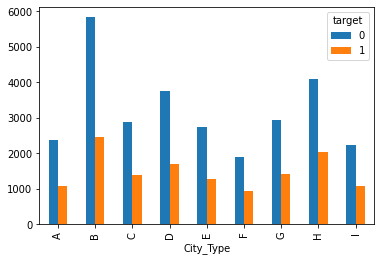

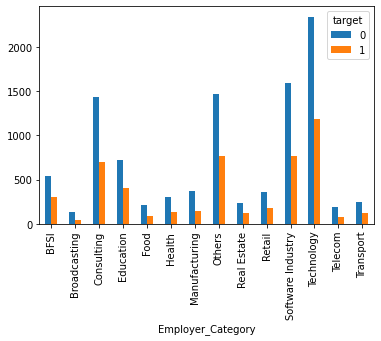

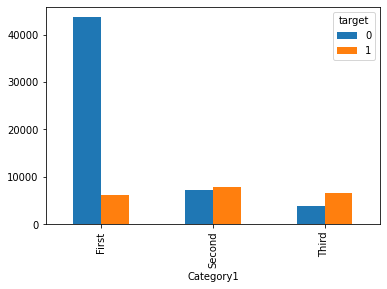

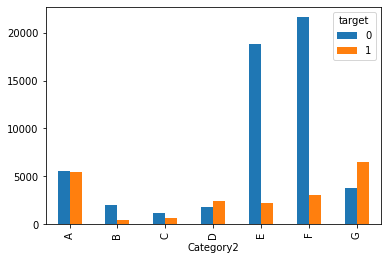

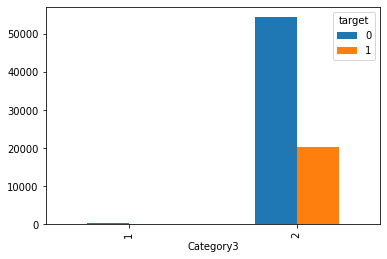

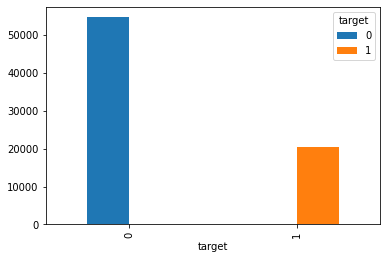

In [15]:
for i in ['City_Type', 'Employer_Category','Category1', 'Category2','Category3','target']:
  train.groupby(i)['target'].value_counts().unstack().plot(kind='bar')

From the above

In [16]:
train['Total_Followers']=train['Online_Follower']+train['LinkedIn_Shared']+train['Twitter_Shared']+train['Facebook_Shared']
test['Total_Followers']=test['Online_Follower']+test['LinkedIn_Shared']+test['Twitter_Shared']+test['Facebook_Shared']


In [17]:
train[['Income', 'Education_Score', 'Age']] = train[['Income', 'Education_Score', 'Age']].apply(lambda x: x.replace('None', 'NaN').astype('float'))
train[['City_Type',	'Employer_Category']] = train[['City_Type',	'Employer_Category']].apply(lambda x: pd.factorize(x)[0])
test[['Income', 'Education_Score', 'Age']] = test[['Income', 'Education_Score', 'Age']].apply(lambda x: x.replace('None', 'NaN').astype('float'))
test[['City_Type',	'Employer_Category']] = test[['City_Type',	'Employer_Category']].apply(lambda x: pd.factorize(x)[0])

In [18]:
c=train['Income'].dropna()
c=c.mode()
print(c)

0    0.0
dtype: float64


In [19]:
d=train['Age'].dropna()
e=train['Education_Score'].dropna()

In [20]:
d=d.median()
e=e.median()
print(d,e)

44.0 79.0


In [21]:
train['Income'].fillna(0.0,inplace=True)
train['Age'].fillna(44,inplace=True)
train['Education_Score'].fillna(79,inplace=True)

test['Income'].fillna(0.0,inplace=True)
test['Age'].fillna(44,inplace=True)
test['Education_Score'].fillna(79,inplace=True)

In [22]:
train['Registration_Date'].fillna(train['First_Interaction'],inplace=True)
test['Registration_Date'].fillna(test['First_Interaction'],inplace=True)

In [23]:
train['Camp_Start_Date']= pd.to_datetime(train['Camp_Start_Date'])
train['Camp_End_Date'] = pd.to_datetime(train['Camp_End_Date'])
train['First_Interaction'] = pd.to_datetime(train['First_Interaction'])
train['Camp_Duration'] = (train['Camp_End_Date'] - train['Camp_Start_Date']).dt.days

In [24]:
test['Camp_Start_Date']= pd.to_datetime(test['Camp_Start_Date'])
test['Camp_End_Date'] = pd.to_datetime(test['Camp_End_Date'])
test['First_Interaction'] = pd.to_datetime(test['First_Interaction'])
test['Camp_Duration'] = (test['Camp_End_Date'] - test['Camp_Start_Date']).dt.days

In [25]:
train['Registration_year'] = pd.to_datetime(train['Registration_Date']).dt.year
train['Registration_month'] = pd.to_datetime(train['Registration_Date']).dt.month
train['Registration_day'] = pd.to_datetime(train['Registration_Date']).dt.day

test['Registration_year'] = pd.to_datetime(test['Registration_Date']).dt.year
test['Registration_month'] = pd.to_datetime(test['Registration_Date']).dt.month
test['Registration_day'] = pd.to_datetime(test['Registration_Date']).dt.day

In [26]:
train['First_Interaction_year'] = pd.to_datetime(train['First_Interaction']).dt.year
train['First_Interaction_month'] = pd.to_datetime(train['First_Interaction']).dt.month
train['First_Interaction_day'] = pd.to_datetime(train['First_Interaction']).dt.day

test['First_Interaction_year'] = pd.to_datetime(test['First_Interaction']).dt.year
test['First_Interaction_month'] = pd.to_datetime(test['First_Interaction']).dt.month
test['First_Interaction_day'] = pd.to_datetime(test['First_Interaction']).dt.day

In [27]:
train['Camp_Start_Date_year'] = pd.to_datetime(train['Camp_Start_Date']).dt.year
train['Camp_Start_Date_month'] = pd.to_datetime(train['Camp_Start_Date']).dt.month
train['Camp_Start_Date_day'] = pd.to_datetime(train['Camp_Start_Date']).dt.day

test['Camp_Start_Date_year'] = pd.to_datetime(test['Camp_Start_Date']).dt.year
test['Camp_Start_Date_month'] = pd.to_datetime(test['Camp_Start_Date']).dt.month
test['Camp_Start_Date_day'] = pd.to_datetime(test['Camp_Start_Date']).dt.day

In [28]:
train['Camp_End_Date_year'] = pd.to_datetime(train['Camp_End_Date']).dt.year
train['Camp_End_Date_month'] = pd.to_datetime(train['Camp_End_Date']).dt.month
train['Camp_End_Date_day'] = pd.to_datetime(train['Camp_End_Date']).dt.day

test['Camp_End_Date_year'] = pd.to_datetime(test['Camp_End_Date']).dt.year
test['Camp_End_Date_month'] = pd.to_datetime(test['Camp_End_Date']).dt.month
test['Camp_End_Date_day'] = pd.to_datetime(test['Camp_End_Date']).dt.day

In [29]:
print(train.shape)
print(train.columns)
train_Health_Camp_ID=train[['Patient_ID','Health_Camp_ID']].copy()
test_Health_Camp_ID=test[['Patient_ID','Health_Camp_ID']].copy()

(75278, 37)
Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var2', 'Var3',
       'Var4', 'id', 'target', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Total_Followers', 'Camp_Duration', 'Registration_year',
       'Registration_month', 'Registration_day', 'First_Interaction_year',
       'First_Interaction_month', 'First_Interaction_day',
       'Camp_Start_Date_year', 'Camp_Start_Date_month', 'Camp_Start_Date_day',
       'Camp_End_Date_year', 'Camp_End_Date_month', 'Camp_End_Date_day'],
      dtype='object')


One Hot Encoding for categorical columns

In [30]:
cat_cols=['Category1','Category2','Category3']
for i in cat_cols:
  X_Dummy=pd.get_dummies(train[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  train = pd.concat([train,X_Dummy], axis=1)
  train.drop([i],axis=1,inplace=True)
  X_Dummy_test=pd.get_dummies(test[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  test = pd.concat([test,X_Dummy_test], axis=1)
  test.drop([i],axis=1,inplace=True)

In [31]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var2,Var3,Var4,id,target,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Total_Followers,Camp_Duration,Registration_year,Registration_month,Registration_day,First_Interaction_year,First_Interaction_month,First_Interaction_day,Camp_Start_Date_year,Camp_Start_Date_month,Camp_Start_Date_day,Camp_End_Date_year,Camp_End_Date_month,Camp_End_Date_day,Category1_First,Category1_Second,Category1_Third,Category2_A,Category2_B,Category2_C,Category2_D,Category2_E,Category2_F,Category2_G,Category3_1,Category3_2
0,489652,6578,10-Sep-05,0,0,0,4896526578,1,0,0,0,0,0.0,79.0,44.0,2004-12-06,-1,-1,2005-08-16,2005-10-14,0,59,2005,9,10,2004,12,6,2005,8,16,2005,10,14,0,0,1,0,0,0,0,0,0,1,0,1
1,507246,6578,18-Aug-05,5,0,0,5072466578,0,0,0,0,0,1.0,75.0,40.0,2004-09-08,0,0,2005-08-16,2005-10-14,0,59,2005,8,18,2004,9,8,2005,8,16,2005,10,14,0,0,1,0,0,0,0,0,0,1,0,1
2,523729,6534,29-Apr-06,0,0,0,5237296534,1,0,0,0,0,0.0,79.0,44.0,2004-06-22,-1,-1,2005-10-17,2007-11-07,0,751,2006,4,29,2004,6,22,2005,10,17,2007,11,7,0,1,0,1,0,0,0,0,0,0,0,1
3,524931,6535,07-Feb-04,0,0,0,5249316535,0,0,0,0,0,0.0,79.0,44.0,2004-02-07,1,-1,2004-02-01,2004-02-18,0,17,2004,2,7,2004,2,7,2004,2,1,2004,2,18,1,0,0,0,0,0,0,1,0,0,0,1
4,521364,6529,28-Feb-06,1,0,0,5213646529,1,0,0,0,1,1.0,70.0,40.0,2003-07-04,1,1,2006-03-30,2006-04-03,1,4,2006,2,28,2003,7,4,2006,3,30,2006,4,3,0,1,0,1,0,0,0,0,0,0,0,1


In [32]:
le =LabelEncoder()
train['Health_Camp_ID_label'] = le.fit_transform(train.Health_Camp_ID.values)
test['Health_Camp_ID_label'] = le.fit_transform(test.Health_Camp_ID.values)

In [33]:
train.drop(['Income','Age','Online_Follower','LinkedIn_Shared','Twitter_Shared','Facebook_Shared','Camp_Start_Date','Camp_End_Date','id','First_Interaction','Registration_Date','Patient_ID','Health_Camp_ID','Employer_Category','City_Type'],axis=1,inplace=True)
test.drop(['Income','Age','Online_Follower','LinkedIn_Shared','Twitter_Shared','Facebook_Shared','Camp_Start_Date','Camp_End_Date','First_Interaction','Registration_Date','Patient_ID','Health_Camp_ID','Employer_Category','City_Type'],axis=1,inplace=True)

In [34]:
print(test.shape)
print(train.shape)

(35249, 29)
(75278, 32)


In [35]:
print(train.columns)
print('==================')
print(test.columns)

Index(['Var2', 'Var3', 'Var4', 'target', 'Education_Score', 'Total_Followers',
       'Camp_Duration', 'Registration_year', 'Registration_month',
       'Registration_day', 'First_Interaction_year', 'First_Interaction_month',
       'First_Interaction_day', 'Camp_Start_Date_year',
       'Camp_Start_Date_month', 'Camp_Start_Date_day', 'Camp_End_Date_year',
       'Camp_End_Date_month', 'Camp_End_Date_day', 'Category1_First',
       'Category1_Second', 'Category1_Third', 'Category2_A', 'Category2_B',
       'Category2_C', 'Category2_D', 'Category2_E', 'Category2_F',
       'Category2_G', 'Category3_1', 'Category3_2', 'Health_Camp_ID_label'],
      dtype='object')
Index(['Var2', 'Var3', 'Var4', 'Education_Score', 'Total_Followers',
       'Camp_Duration', 'Registration_year', 'Registration_month',
       'Registration_day', 'First_Interaction_year', 'First_Interaction_month',
       'First_Interaction_day', 'Camp_Start_Date_year',
       'Camp_Start_Date_month', 'Camp_Start_Date_day', 'C

In [36]:
test['Category2_B']=0
test['Category3_1']=0
print(test.shape)
print(train.shape)#Difference is of only Target column now

(35249, 31)
(75278, 32)


In [37]:
train.tail(20)

,Var2,Var3,Var4,target,Education_Score,Total_Followers,Camp_Duration,Registration_year,Registration_month,Registration_day,First_Interaction_year,First_Interaction_month,First_Interaction_day,Camp_Start_Date_year,Camp_Start_Date_month,Camp_Start_Date_day,Camp_End_Date_year,Camp_End_Date_month,Camp_End_Date_day,Category1_First,Category1_Second,Category1_Third,Category2_A,Category2_B,Category2_C,Category2_D,Category2_E,Category2_F,Category2_G,Category3_1,Category3_2,Health_Camp_ID_label
75258,0,0,0,1,79.0,0,58,2005,12,19,2005,11,30,2005,12,3,2006,1,30,0,0,1,0,0,0,0,0,0,1,0,1,16
75259,0,0,0,0,79.0,0,3,2004,10,31,2004,9,30,2004,11,1,2004,11,4,1,0,0,0,0,0,0,1,0,0,0,1,15
75260,0,0,0,0,79.0,0,48,2004,12,4,2004,1,19,2005,1,3,2005,2,20,1,0,0,0,0,0,0,1,0,0,0,1,2
75261,0,0,0,0,79.0,0,771,2006,6,13,2006,6,3,2005,9,27,2007,11,7,1,0,0,0,0,0,0,0,1,0,0,1,18
75262,0,0,0,1,81.0,0,59,2005,8,5,2003,4,19,2005,8,16,2005,10,14,0,0,1,0,0,0,0,0,0,1,0,1,38
75263,1,0,0,1,79.0,0,17,2004,6,27,2003,3,26,2004,10,1,2004,10,18,1,0,0,0,0,0,0,1,0,0,0,1,42
75264,0,0,0,0,79.0,2,17,2004,6,7,2004,4,10,2004,10,1,2004,10,18,1,0,0,0,0,0,0,1,0,0,0,1,42
75265,0,0,0,0,79.0,0,3,2005,8,15,2004,1,29,2005,10,9,2005,10,12,1,0,0,0,0,0,0,1,0,0,0,1,36
75266,0,0,0,0,79.0,0,13,2005,7,18,2004,9,25,2005,7,9,2005,7,22,1,0,0,0,0,0,0,1,0,0,0,1,35
75267,0,0,0,1,79.0,0,771,2005,11,15,2005,6,16,2005,9,27,2007,11,7,1,0,0,0,0,0,0,0,1,0,0,1,18


In [38]:
# from sklearn.preprocessing import QuantileTransformer,RobustScaler
# scaler = RobustScaler()
# transform_list=['Education_Score','Age','Total_Followers','Camp_Duration','Registration_year','Registration_month','Registration_day','First_Interaction_year','First_Interaction_month','First_Interaction_day','Camp_Start_Date_year','Camp_Start_Date_month','Camp_Start_Date_day','Camp_End_Date_year','Camp_End_Date_month','Camp_End_Date_day']
# train[['Education_Score','Age','Total_Followers','Camp_Duration','Registration_year','Registration_month','Registration_day','First_Interaction_year','First_Interaction_month','First_Interaction_day','Camp_Start_Date_year','Camp_Start_Date_month','Camp_Start_Date_day','Camp_End_Date_year','Camp_End_Date_month','Camp_End_Date_day']] = scaler.fit_transform(train[['Education_Score','Age','Total_Followers','Camp_Duration','Registration_year','Registration_month','Registration_day','First_Interaction_year','First_Interaction_month','First_Interaction_day','Camp_Start_Date_year','Camp_Start_Date_month','Camp_Start_Date_day','Camp_End_Date_year','Camp_End_Date_month','Camp_End_Date_day']])
# test[['Education_Score','Age','Total_Followers','Camp_Duration','Registration_year','Registration_month','Registration_day','First_Interaction_year','First_Interaction_month','First_Interaction_day','Camp_Start_Date_year','Camp_Start_Date_month','Camp_Start_Date_day','Camp_End_Date_year','Camp_End_Date_month','Camp_End_Date_day']] = scaler.transform(test[['Education_Score','Age','Total_Followers','Camp_Duration','Registration_year','Registration_month','Registration_day','First_Interaction_year','First_Interaction_month','First_Interaction_day','Camp_Start_Date_year','Camp_Start_Date_month','Camp_Start_Date_day','Camp_End_Date_year','Camp_End_Date_month','Camp_End_Date_day']])


In [39]:
train.head()

,Var2,Var3,Var4,target,Education_Score,Total_Followers,Camp_Duration,Registration_year,Registration_month,Registration_day,First_Interaction_year,First_Interaction_month,First_Interaction_day,Camp_Start_Date_year,Camp_Start_Date_month,Camp_Start_Date_day,Camp_End_Date_year,Camp_End_Date_month,Camp_End_Date_day,Category1_First,Category1_Second,Category1_Third,Category2_A,Category2_B,Category2_C,Category2_D,Category2_E,Category2_F,Category2_G,Category3_1,Category3_2,Health_Camp_ID_label
0,0,0,0,1,79.0,0,59,2005,9,10,2004,12,6,2005,8,16,2005,10,14,0,0,1,0,0,0,0,0,0,1,0,1,38
1,5,0,0,0,75.0,0,59,2005,8,18,2004,9,8,2005,8,16,2005,10,14,0,0,1,0,0,0,0,0,0,1,0,1,38
2,0,0,0,1,79.0,0,751,2006,4,29,2004,6,22,2005,10,17,2007,11,7,0,1,0,1,0,0,0,0,0,0,0,1,9
3,0,0,0,0,79.0,0,17,2004,2,7,2004,2,7,2004,2,1,2004,2,18,1,0,0,0,0,0,0,1,0,0,0,1,10
4,1,0,0,1,70.0,1,4,2006,2,28,2003,7,4,2006,3,30,2006,4,3,0,1,0,1,0,0,0,0,0,0,0,1,5


In [40]:
print(test.shape)
print(train.shape)#Difference is of only Target column now

(35249, 31)
(75278, 32)


In [41]:
for i in train.columns:
  print(i,train['target'].corr(train[i],method='pearson'))

Var2 0.03308529208406491
Var3 0.013815100585715376
Var4 0.032514052354812695
target 1.0
Education_Score -0.0035607196467891547
Total_Followers 0.05868294812979181
Camp_Duration -0.023284891877900508
Registration_year 0.17193135821099512
Registration_month -0.06965746886870386
Registration_day 0.030011441368964324
First_Interaction_year 0.05987107571297558
First_Interaction_month -0.04659384905692302
First_Interaction_day -0.005878678958270991
Camp_Start_Date_year 0.2242908870674425
Camp_Start_Date_month -0.04909589015550212
Camp_Start_Date_day 0.030317173995203887
Camp_End_Date_year 0.0977633515136592
Camp_End_Date_month 0.06609284831326671
Camp_End_Date_day 0.12655081987576522
Category1_First -0.4663074896976069
Category1_Second 0.27521281088370336
Category1_Third 0.3210547021088468
Category2_A 0.20611386374112195
Category2_B -0.04640237506687318
Category2_C 0.03090967400761091
Category2_D 0.16466645905167573
Category2_E -0.2361280755742978
Category2_F -0.2367639423811197
Category2_G 

In [42]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [43]:
from pycaret.classification import *
exp_clf101 = setup(data = train, target = 'target', session_id=123)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8219,0.8545,0.5807,0.7130,0.6400,0.5234,0.5283,25.3412
1,Light Gradient Boosting Machine,0.8212,0.8506,0.5724,0.7151,0.6357,0.5192,0.5249,0.9434
2,Gradient Boosting Classifier,0.8130,0.8393,0.5571,0.6964,0.6189,0.4970,0.5025,11.1717
3,Extreme Gradient Boosting,0.8115,0.8389,0.5497,0.6953,0.6139,0.4915,0.4974,8.8151
4,Ada Boost Classifier,0.7989,0.8258,0.5276,0.6657,0.5885,0.4578,0.4633,3.5427
5,Ridge Classifier,0.7980,0.0000,0.5470,0.6555,0.5963,0.4631,0.4665,0.1563
6,Linear Discriminant Analysis,0.7975,0.8223,0.5570,0.6503,0.6000,0.4655,0.4680,1.2386
7,Random Forest Classifier,0.7945,0.8108,0.5205,0.6551,0.5799,0.4464,0.4516,0.7259
8,K Neighbors Classifier,0.7916,0.7848,0.5117,0.6500,0.5726,0.4374,0.4429,2.1610
9,Extra Trees Classifier,0.7912,0.8043,0.5459,0.6365,0.5877,0.4490,0.4514,9.1835


With help of Pycaret we can see that Catboost would provide us with the best AUC score.

In [44]:
X=train.drop(['target'],axis=1)
y=train.target.copy()


In [45]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0) 

In [46]:
#Logistic Regression-Train
import warnings
warnings.filterwarnings('ignore')

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Test score is  0.7369374446501892
ROC-AUC score is  0.6536689101103469


In [47]:
#Random Forest
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
RFmodel=RandomForestClassifier(n_estimators=1000,n_jobs=100,random_state=0)
RFmodel.fit(X_train,y_train)
y_pred=RFmodel.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Test score is  0.804162305772482
ROC-AUC score is  0.7562876729108616


In [48]:
#Gradient Boosting
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
gb_clf= GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
y_pred=gb_clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Test score is  0.8104419933982772
ROC-AUC score is  0.7681935683247945


In [49]:
#ADA Boost
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
dt_clf=DecisionTreeClassifier(max_depth=1,random_state=0)#1)this is our weak classifier,2)Max_depth has to be one else it will become a stronger classifier which would be beneficial here but would affect our ADAboost in a negative manner 
dt_clf.fit(X_train,y_train)
dt_score=dt_clf.score(X_test,y_test)
print("dt_score is",dt_score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

#AdaBoost
 
ada_clf=AdaBoostClassifier(base_estimator=dt_clf,random_state=0)
ada_clf.fit(X_train,y_train)
ada_score=ada_clf.score(X_test,y_test)
print("ada_score is",ada_score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

dt_score is 0.7701070767249014
ROC-AUC score is  0.7681935683247945
ada_score is 0.7969970211738185
ROC-AUC score is  0.7681935683247945


In [50]:
#KNN

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Test score is  0.7924482730859029
ROC-AUC score is  0.7441872872191359


In [51]:
#Ridge Classifier
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
clf = RidgeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Test score is  0.7907173335480235
ROC-AUC score is  0.736221943501887


In [52]:
#LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfld = LinearDiscriminantAnalysis()
clfld.fit(X_train, y_train)
y_pred=clfld.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Test score is  0.7898719909830126
ROC-AUC score is  0.7349716552320683


In [53]:
# #SVM
# X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
# model = svm.SVC(kernel='linear', C = 1)
# svmc= model.fit(X_train, y_train)
# y_pred=svmc.predict(X_test)
# score=accuracy_score(y_pred,y_test)
# print("Test score is ",score)
# print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

In [54]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

In [55]:
#Catboost

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from catboost import CatBoostClassifier
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
catbst = CatBoostClassifier()
catbst.fit(X_train, y_train)
y_pred=catbst.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Learning rate set to 0.054955
0:	learn: 0.6649028	total: 26.1ms	remaining: 26.1s
1:	learn: 0.6388879	total: 50.4ms	remaining: 25.1s
2:	learn: 0.6157704	total: 75.8ms	remaining: 25.2s
3:	learn: 0.5946744	total: 102ms	remaining: 25.4s
4:	learn: 0.5775141	total: 133ms	remaining: 26.4s
5:	learn: 0.5622930	total: 159ms	remaining: 26.3s
6:	learn: 0.5486233	total: 185ms	remaining: 26.2s
7:	learn: 0.5373293	total: 216ms	remaining: 26.7s
8:	learn: 0.5268809	total: 241ms	remaining: 26.5s
9:	learn: 0.5179414	total: 267ms	remaining: 26.4s
10:	learn: 0.5096510	total: 296ms	remaining: 26.6s
11:	learn: 0.5023775	total: 321ms	remaining: 26.4s
12:	learn: 0.4957021	total: 347ms	remaining: 26.3s
13:	learn: 0.4902145	total: 375ms	remaining: 26.4s
14:	learn: 0.4852443	total: 402ms	remaining: 26.4s
15:	learn: 0.4804129	total: 444ms	remaining: 27.3s
16:	learn: 0.4762476	total: 474ms	remaining: 27.4s
17:	learn: 0.4729285	total: 513ms	remaining: 28s
18:	learn: 0.4695201	total: 543ms	remaining: 28s
19:	learn: 0

In [56]:
# CatBoost parameters
# from hyperopt import hp
# ctb_reg_params = {
#     'learning_rate':     hp.choice('learning_rate',     np.arange(0.05, 0.31, 0.05)),
#     'max_depth':         hp.choice('max_depth',         np.arange(5, 16, 1, dtype=int)),
#     'colsample_bylevel': hp.choice('colsample_bylevel', np.arange(0.3, 0.8, 0.1)),
#     'n_estimators':      100,
#     'eval_metric':       'Accuracy',
# }


In [57]:
# params = {'depth':[5,10],'iterations':[100],'learning_rate':[0.001],
#               'l2_leaf_reg':[1,5,10],
#               'border_count':[5,10],
#               'bagging_temperature':[0.03,0.09,0.25,0.75]}

# model = CatBoostClassifier()
# grid_search_result = model.grid_search(params,X=X_train,y=y_train,cv=5,stratified=True)
# grid_search_result.fit(X_train, y_train)
# y_pred_train=grid_search_result.predict(X_train)
# score_train=accuracy_score(y_pred_train,y_train)
# print("Train score is ",score_train)
# y_pred=grid_search_result.predict(X_test)
# score=accuracy_score(y_pred,y_test)
# print("Test score is ",score)
# print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

In [ ]:
# print(randm.best_params_)

In [63]:
#Ensemble
from sklearn import model_selection
from lightgbm import LGBMClassifier
classifier_list=[('lgbm',LGBMClassifier()),('catb',CatBoostClassifier()),('lda',LinearDiscriminantAnalysis())]

sclf = StackingClassifier(estimators=classifier_list, final_estimator=GaussianNB())

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
# Code starts here

sclf.fit(X_train,y_train)
y_pred=sclf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Streaming output truncated to the last 5000 lines.
7:	learn: 0.5465332	total: 181ms	remaining: 22.4s
8:	learn: 0.5361555	total: 213ms	remaining: 23.4s
9:	learn: 0.5272006	total: 231ms	remaining: 22.9s
10:	learn: 0.5188051	total: 253ms	remaining: 22.8s
11:	learn: 0.5115082	total: 276ms	remaining: 22.7s
12:	learn: 0.5052731	total: 296ms	remaining: 22.5s
13:	learn: 0.4993180	total: 318ms	remaining: 22.4s
14:	learn: 0.4944084	total: 337ms	remaining: 22.1s
15:	learn: 0.4900072	total: 358ms	remaining: 22s
16:	learn: 0.4850475	total: 380ms	remaining: 22s
17:	learn: 0.4807469	total: 404ms	remaining: 22.1s
18:	learn: 0.4769835	total: 430ms	remaining: 22.2s
19:	learn: 0.4734335	total: 452ms	remaining: 22.1s
20:	learn: 0.4706784	total: 473ms	remaining: 22.1s
21:	learn: 0.4678680	total: 495ms	remaining: 22s
22:	learn: 0.4654448	total: 518ms	remaining: 22s
23:	learn: 0.4631524	total: 540ms	remaining: 21.9s
24:	learn: 0.4613080	total: 561ms	remaining: 21.9s
25:	learn: 0.4595035	total: 582ms	remainin

In [64]:
#XG Boost
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
xgb_model = XGBClassifier(base_estimator=clfld, random_state=0)
xgb_model.fit(X_train, y_train)
xgb_score= xgb_model.score(X_test,y_test)
print("\nScore of XGBoost:",xgb_score)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))


Score of XGBoost: 0.8098784316882699
ROC-AUC score is  0.7618747104459329


In [65]:
# from lightgbm import LGBMClassifier
# lgbm = LGBMClassifier
# X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33,stratify=y, random_state=0)
# lgbm.fit(X_train,y_train)
# y_pred=lgbm.predict(X_test)
# score=accuracy_score(y_pred,y_test)
# print("Test score is ",score)
# print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

In [66]:
#Naive classifier
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
score=accuracy_score(y_pred,y_test)
print("Test score is ",score)
print('ROC-AUC score is ',roc_auc_score(y_pred,y_test))

Test score is  0.7666049432412849
ROC-AUC score is  0.7181559688888418


In [67]:
test_Health_Camp_ID

,Patient_ID,Health_Camp_ID
0,505701,6548
1,500633,6584
2,506945,6582
3,497447,6551
4,496446,6533
...,...,...
35244,507261,6525
35245,513607,6551
35246,498160,6584
35247,502444,6567


In [68]:
test_pred = pd.DataFrame(sclf.predict_proba(test))

test_pred['Outcome']=1-test_pred[0]
test_pred.head(30)

,0,1,Outcome
0,0.000085,0.999915,0.999915
1,0.024249,0.975751,0.975751
2,0.257312,0.742688,0.742688
3,0.006664,0.993336,0.993336
4,0.953910,0.046090,0.046090
5,0.000029,0.999971,0.999971
6,0.000171,0.999829,0.999829
7,0.009205,0.990795,0.990795
8,0.017797,0.982203,0.982203
9,0.000295,0.999705,0.999705


In [69]:
submission = pd.DataFrame({'Patient_ID':test_Health_Camp_ID['Patient_ID'],'Health_Camp_ID':test_Health_Camp_ID['Health_Camp_ID']})
submission['Outcome']=test_pred['Outcome']
#Visualize the first 5 rows
submission.head()


,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.999915
1,500633,6584,0.975751
2,506945,6582,0.742688
3,497447,6551,0.993336
4,496446,6533,0.046090


In [70]:
filename = 'Healthcare_submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Healthcare_submission.csv
